In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats

In [3]:
# Load CSV file into Dataframe
sleep_data_df = pd.read_csv('Resources/Sleep_health_and_lifestyle_dataset.csv')

sleep_data_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [17]:
# Sort only needed Data and Group it
needed_data_df = sleep_data_df[['Sleep Duration', 'Quality of Sleep', 'Sleep Disorder']].copy()
needed_data_df.head()
duration_grouped = needed_data_df.groupby('Sleep Disorder')['Sleep Duration'].mean()
quality_grouped = needed_data_df.groupby('Sleep Disorder')['Quality of Sleep'].mean()
grouped_data_df = pd.DataFrame({
    'Sleep Duration': duration_grouped,
    'Quality of Sleep': quality_grouped
})
grouped_data_df

,Sleep Duration,Quality of Sleep
Sleep Disorder,,
Insomnia,6.589610,6.532468
None,7.358447,7.625571
Sleep Apnea,7.032051,7.205128


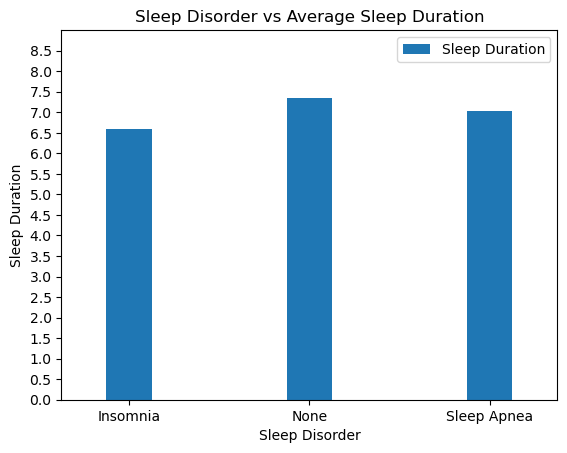

In [43]:
# Graph Duration Data
grouped_data_df.plot(y= 'Sleep Duration', kind='bar', width=.25)
plt.title('Sleep Disorder vs Average Sleep Duration')
plt.ylabel('Sleep Duration')
plt.ylim(0,9)
plt.yticks(np.arange(0, 9, .5))
plt.xticks(rotation=0)
plt.show()

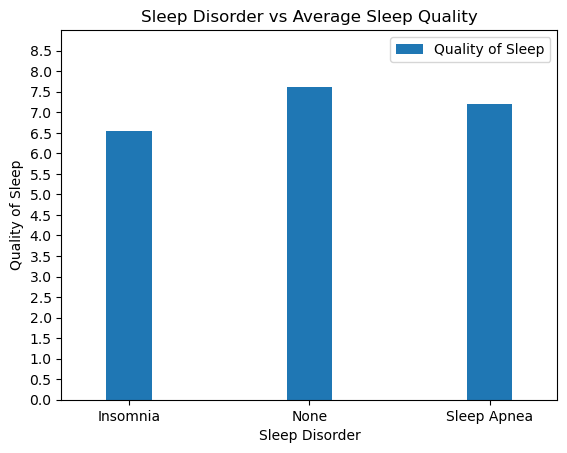

In [37]:
# Graph Quality Data
grouped_data_df.plot(y= 'Quality of Sleep', kind='bar', width=.25, )
plt.title('Sleep Disorder vs Average Sleep Quality')
plt.ylabel('Quality of Sleep')
plt.ylim(0,9)
plt.yticks(np.arange(0, 9, .5))
plt.xticks(rotation=0)
plt.show()